# Load data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# display settings
pd.set_option('display.max_colwidth', None)

In [6]:
filename = 'data/corpus.csv'

In [7]:
with open(filename, "r") as data:
    data_dict = pd.read_csv(
        filename, names=["title", "sample"], header=None, dtype=str
    )

In [8]:
data_dict.shape

(826, 2)

In [9]:
data_dict.head()

title  \
0         Describe an important choice you had to make in your life.   
1                       Describe someone you know who is very brave.   
2  Describe a beautiful village or rural area that you have visited.   
3              Describe an interesting person you have met recently.   
4                            Describe an important day in your life.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          sample  
0                       Up until my university graduation years, about 5/6 years ago, I was a rather physically weak person for my age, and I desperately wanted to change that. But, just when I was planning to join a local sports club or a gym to have some physical activities, I was offered a very lucrative internship position at a very prestigious accounting firm in my country. So, it was time for me to make a choice.  Today, I will tell you how I actually went about making that choice, and how I felt about it.|Oh, the choice was obvious for me since I really wanted to get in physically good shape. So, I went ahead and joined a famous gym in my town. But, making that decision for me wasn’t exactly that easy since I needed to prepare my mind and body for a completely different kind of challenge. After all, all those years, running up to my graduation, I was only busy studying, doing home works and preparing for examinations.|Of course, my parents had advised me back then to get involved in some kind of physical and extra-curricular activities, but I guess that I was just too lazy at that time to follow through with their good advice. Besides, my regular routines also got messed up initially as I was trying to keep up with the routine fitness work and sweating at the exercise club. My routine and tough physical activities had gone like this for almost 6 months under the strict supervision of a gym instructor. By the way, initially, I was a bit sceptical about denying that lucrative internship position, but then, later on, I felt so glad that I actually made that decision in favour of joining a gym.|But, in the end, the result was stunning as I happ

In [10]:
# str
data_dict.iloc[0]['sample']

'Up until my university graduation years, about 5/6 years ago, I was a rather physically weak person for my age, and I desperately wanted to change that. But, just when I was planning to join a local sports club or a gym to have some physical activities, I was offered a very lucrative internship position at a very prestigious accounting firm in my country. So, it was time for me to make a choice.  Today, I will tell you how I actually went about making that choice, and how I felt about it.|Oh, the choice was obvious for me since I really wanted to get in physically good shape. So, I went ahead and joined a famous gym in my town. But, making that decision for me wasn’t exactly that easy since I needed to prepare my mind and body for a completely different kind of challenge. After all, all those years, running up to my graduation, I was only busy studying, doing home works and preparing for examinations.|Of course, my parents had advised me back then to get involved in some kind of physi

# Preprocessing

## 0) drop nans

In [11]:
data_dict = data_dict.dropna()
data_dict.shape

(820, 2)

## 1 ) Remove punctuation

In [20]:
import re
data_dict["sample_processed"] = data_dict["sample"].map(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))

In [21]:
data_dict.head(5)

title  \
0         Describe an important choice you had to make in your life.   
1                       Describe someone you know who is very brave.   
2  Describe a beautiful village or rural area that you have visited.   
3              Describe an interesting person you have met recently.   
4                            Describe an important day in your life.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          sample  \
0                       Up until my university graduation years, about 5/6 years ago, I was a rather physically weak person for my age, and I desperately wanted to change that. But, just when I was planning to join a local sports club or a gym to have some physical activities, I was offered a very lucrative internship position at a very prestigious accounting firm in my country. So, it was time for me to make a choice.  Today, I will tell you how I actually went about making that choice, and how I felt about it.|Oh, the choice was obvious for me since I really wanted to get in physically good shape. So, I went ahead and joined a famous gym in my town. But, making that decision for me wasn’t exactly that easy since I needed to prepare my mind and body for a completely different kind of challenge. After all, all those years, running up to my graduation, I was only busy studying, doing home works and preparing for examinations.|Of course, my parents had advised me back then to get involved in some kind of physical and extra-curricular activities, but I guess that I was just too lazy at that time to follow through with their good advice. Besides, my regular routines also got messed up initially as I was trying to keep up with the routine fitness work and sweating at the exercise club. My routine and tough physical activities had gone like this for almost 6 months under the strict supervision of a gym instructor. By the way, initially, I was a bit sceptical about denying that lucrative internship position, but then, later on, I felt so glad that I actually made that decision in favour of joining a gym.|But, in the end, the result was stunning as I hap

## 2 Lower case

In [22]:
# to lower case
data_dict['sample_processed'] = data_dict['sample_processed'].map(lambda x: x.lower())

In [23]:
data_dict.head(2)

title  \
0  Describe an important choice you had to make in your life.   
1                Describe someone you know who is very brave.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     sample  \
0  Up until my university graduation years, about 5/6 years ago, I was a rather physically weak person for my age, and I desperately wanted to change that. But, just when I was planning to join a local sports club or a gym to have some physical activities, I was offered a very lucrative internship position at a very prestigious accounting firm in my country. So, it was time for me to make a choice.  Today, I will tell you how I actually went about making that choice, and how I felt about it.|Oh, the choice was obvious for me since I really wanted to get in physically good shape. So, I went ahead and joined a famous gym in my town. But, making that decision for me wasn’t exactly that easy since I needed to prepare my mind and body for a completely different kind of challenge. After all, all those years, running up to my graduation, I was only busy studying, doing home works and preparing for examinations.|Of course, my parents had advised me back then to get involved in some kind of physical and extra-curricular activities, but I guess that I was just too lazy at that time to follow through with their good advice. Besides, my regular routines also got messed up initially as I was trying to keep up with the routine fitness work and sweating at the exercise club. My routine and tough physical activities had gone like this for almost 6 months under the strict supervision of a gym instructor. By the way, initially, I was a bit sceptical about denying that lucrative internship position, but then, later on, I felt so glad that I actually made that decision in favour of joining a gym.|But, in the end, the result was stunning as I happily noticed that there was some remarkable improvement in my body shape. I didn’t just feel great about my appearance and all those muscles, but I also felt really great and confident, mentally. In fact, I felt like I was up for any kind of personal and professional chal

## 3 remove numbers

In [24]:
data_dict['sample_processed'] = data_dict['sample_processed'].map(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [25]:
data_dict.head(2)

title  \
0  Describe an important choice you had to make in your life.   
1                Describe someone you know who is very brave.   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     sample  \
0  Up until my university graduation years, about 5/6 years ago, I was a rather physically weak person for my age, and I desperately wanted to change that. But, just when I was planning to join a local sports club or a gym to have some physical activities, I was offered a very lucrative internship position at a very prestigious accounting firm in my country. So, it was time for me to make a choice.  Today, I will tell you how I actually went about making that choice, and how I felt about it.|Oh, the choice was obvious for me since I really wanted to get in physically good shape. So, I went ahead and joined a famous gym in my town. But, making that decision for me wasn’t exactly that easy since I needed to prepare my mind and body for a completely different kind of challenge. After all, all those years, running up to my graduation, I was only busy studying, doing home works and preparing for examinations.|Of course, my parents had advised me back then to get involved in some kind of physical and extra-curricular activities, but I guess that I was just too lazy at that time to follow through with their good advice. Besides, my regular routines also got messed up initially as I was trying to keep up with the routine fitness work and sweating at the exercise club. My routine and tough physical activities had gone like this for almost 6 months under the strict supervision of a gym instructor. By the way, initially, I was a bit sceptical about denying that lucrative internship position, but then, later on, I felt so glad that I actually made that decision in favour of joining a gym.|But, in the end, the result was stunning as I happily noticed that there was some remarkable improvement in my body shape. I didn’t just feel great about my appearance and all those muscles, but I also felt really great and confident, mentally. In fact, I felt like I was up for any kind of personal and professional chal

## wordcloud

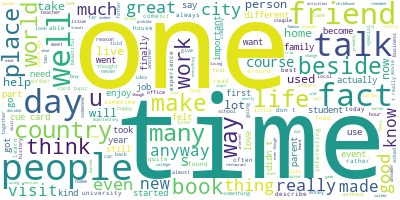

In [26]:
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(data_dict['sample_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## 4 Tokenization

In [27]:
from nltk import word_tokenize

def tokenize(lst):
    return ([word_tokenize(i) for i in lst])

In [28]:
data = data_dict.sample_processed.values.tolist()
data_words = tokenize(data)
data_words[:1]

[['up',
  'until',
  'my',
  'university',
  'graduation',
  'years',
  'about',
  'years',
  'ago',
  'i',
  'was',
  'a',
  'rather',
  'physically',
  'weak',
  'person',
  'for',
  'my',
  'age',
  'and',
  'i',
  'desperately',
  'wanted',
  'to',
  'change',
  'that',
  'but',
  'just',
  'when',
  'i',
  'was',
  'planning',
  'to',
  'join',
  'a',
  'local',
  'sports',
  'club',
  'or',
  'a',
  'gym',
  'to',
  'have',
  'some',
  'physical',
  'activities',
  'i',
  'was',
  'offered',
  'a',
  'very',
  'lucrative',
  'internship',
  'position',
  'at',
  'a',
  'very',
  'prestigious',
  'accounting',
  'firm',
  'in',
  'my',
  'country',
  'so',
  'it',
  'was',
  'time',
  'for',
  'me',
  'to',
  'make',
  'a',
  'choice',
  'today',
  'i',
  'will',
  'tell',
  'you',
  'how',
  'i',
  'actually',
  'went',
  'about',
  'making',
  'that',
  'choice',
  'and',
  'how',
  'i',
  'felt',
  'about',
  'it',
  'oh',
  'the',
  'choice',
  'was',
  'obvious',
  'for',
  '

In [29]:
def count_len(lst):
    x = 0
    for i in lst:
        for j in i:
            for k in j:
                x += 1
    return x


In [30]:
count_len(data_words)

3341781

## 5 remove Stop words and make bigrams

In [31]:
# get stop words
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.utils import simple_preprocess

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'like', 'would', 'one', 'time', 'make', 'go', 'also'])
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/irtazahashmi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/irtazahashmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/irtazahashmi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/irtazahashmi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/irtazahashmi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [34]:
# Build the bigram and trigram models
import gensim

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
trigram_mod[bigram_mod[data_words[0]]]

['up',
 'until',
 'my',
 'university',
 'graduation',
 'years',
 'about',
 'years_ago',
 'i',
 'was',
 'a',
 'rather',
 'physically',
 'weak',
 'person',
 'for',
 'my',
 'age',
 'and',
 'i',
 'desperately',
 'wanted',
 'to',
 'change',
 'that',
 'but',
 'just',
 'when',
 'i',
 'was',
 'planning',
 'to',
 'join',
 'a',
 'local',
 'sports',
 'club',
 'or',
 'a',
 'gym',
 'to',
 'have',
 'some',
 'physical',
 'activities',
 'i',
 'was',
 'offered',
 'a',
 'very',
 'lucrative',
 'internship_position',
 'at',
 'a',
 'very',
 'prestigious',
 'accounting',
 'firm',
 'in',
 'my',
 'country',
 'so',
 'it',
 'was',
 'time',
 'for',
 'me',
 'to',
 'make',
 'a',
 'choice',
 'today',
 'i',
 'will',
 'tell',
 'you',
 'how',
 'i',
 'actually',
 'went',
 'about',
 'making',
 'that',
 'choice',
 'and',
 'how',
 'i',
 'felt',
 'about',
 'it',
 'oh',
 'the',
 'choice',
 'was',
 'obvious',
 'for',
 'me',
 'since',
 'i',
 'really',
 'wanted',
 'to',
 'get',
 'in',
 'physically',
 'good',
 'shape',
 'so',
 

In [35]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [36]:
# Remove Stop Words
data_words = remove_stopwords(data_words)
data_words[:1]

[['university',
  'graduation',
  'years',
  'years',
  'ago',
  'rather',
  'physically',
  'weak',
  'person',
  'age',
  'desperately',
  'wanted',
  'change',
  'planning',
  'join',
  'local',
  'sports',
  'club',
  'gym',
  'physical',
  'activities',
  'offered',
  'lucrative',
  'internship',
  'position',
  'prestigious',
  'accounting',
  'firm',
  'country',
  'choice',
  'today',
  'tell',
  'actually',
  'went',
  'making',
  'choice',
  'felt',
  'oh',
  'choice',
  'obvious',
  'since',
  'really',
  'wanted',
  'get',
  'physically',
  'good',
  'shape',
  'went',
  'ahead',
  'joined',
  'famous',
  'gym',
  'town',
  'making',
  'decision',
  'exactly',
  'easy',
  'since',
  'needed',
  'prepare',
  'mind',
  'body',
  'completely',
  'different',
  'kind',
  'challenge',
  'years',
  'running',
  'graduation',
  'busy',
  'studying',
  'home',
  'works',
  'preparing',
  'examinations',
  'course',
  'parents',
  'advised',
  'back',
  'get',
  'involved',
  'kind'

In [39]:
# bigrams
data_words = make_bigrams(data_words)

In [41]:
data_words

[['university',
  'graduation',
  'years',
  'years',
  'ago',
  'rather',
  'physically',
  'weak',
  'person',
  'age',
  'desperately',
  'wanted',
  'change',
  'planning',
  'join',
  'local',
  'sports',
  'club',
  'gym',
  'physical',
  'activities',
  'offered',
  'lucrative',
  'internship_position',
  'prestigious',
  'accounting',
  'firm',
  'country',
  'choice',
  'today',
  'tell',
  'actually',
  'went',
  'making',
  'choice',
  'felt',
  'oh',
  'choice',
  'obvious',
  'since',
  'really',
  'wanted',
  'get',
  'physically',
  'good',
  'shape',
  'went',
  'ahead',
  'joined',
  'famous',
  'gym',
  'town',
  'making',
  'decision',
  'exactly',
  'easy',
  'since',
  'needed',
  'prepare',
  'mind',
  'body',
  'completely',
  'different',
  'kind',
  'challenge',
  'years',
  'running',
  'graduation',
  'busy',
  'studying',
  'home',
  'works',
  'preparing',
  'examinations',
  'course',
  'parents',
  'advised',
  'back',
  'get',
  'involved',
  'kind',
  '

In [40]:
count_len(data_words)

2184186

## 6 Lemmaziation

In [42]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}

    return tag_dict.get(tag, wn.NOUN)

def lemmatization(texts):    
    texts_out = []
    
    for tokens in texts:
        words_out =[]
        lemma_function = WordNetLemmatizer()
        for token in tokens:
            lemma = lemma_function.lemmatize(token, get_wordnet_pos(token))
            words_out.append(lemma)

        texts_out.append(words_out)
    
    return texts_out

In [43]:
# Do lemmatization keeping only noun, adj, vb, adv
data_words = lemmatization(data_words)
data_words[:1]

[['university',
  'graduation',
  'year',
  'year',
  'ago',
  'rather',
  'physically',
  'weak',
  'person',
  'age',
  'desperately',
  'want',
  'change',
  'planning',
  'join',
  'local',
  'sport',
  'club',
  'gym',
  'physical',
  'activity',
  'offer',
  'lucrative',
  'internship_position',
  'prestigious',
  'accounting',
  'firm',
  'country',
  'choice',
  'today',
  'tell',
  'actually',
  'go',
  'make',
  'choice',
  'felt',
  'oh',
  'choice',
  'obvious',
  'since',
  'really',
  'want',
  'get',
  'physically',
  'good',
  'shape',
  'go',
  'ahead',
  'join',
  'famous',
  'gym',
  'town',
  'make',
  'decision',
  'exactly',
  'easy',
  'since',
  'need',
  'prepare',
  'mind',
  'body',
  'completely',
  'different',
  'kind',
  'challenge',
  'year',
  'run',
  'graduation',
  'busy',
  'study',
  'home',
  'work',
  'prepare',
  'examination',
  'course',
  'parent',
  'advise',
  'back',
  'get',
  'involve',
  'kind',
  'physical',
  'extra_curricular',
  'ac

In [44]:
count_len(data_words)

2060102

## wordcloud again

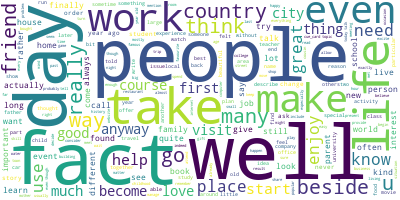

In [45]:
import itertools

data_lemmatized_flat = (list(itertools.chain.from_iterable(data_words)))
# Join the different processed titles together.
long_string = ','.join(data_lemmatized_flat)          
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

## To dictionary

In [46]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
corpus[:1]

[[(0, 1),
  (1, 3),
  (2, 2),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 3),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 4),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 3),
  (42, 1),
  (43, 3),
  (44, 2),
  (45, 2),
  (46, 2),
  (47, 1),
  (48, 4),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 3),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 2),
  (79, 1),
  (80, 2),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 3),
  (89, 1),
  (90, 1),
  (91, 2)

# First model

In [47]:
# Build base LDA model
from gensim import models

num_topics = 10
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                               id2word=id2word,
                               num_topics=num_topics, 
                               random_state=100,
                               update_every=1,
                               chunksize=100,
                               passes=10,
                               per_word_topics=True,
                               alpha='auto')

In [48]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.015*"work" + 0.011*"good" + 0.010*"well" + 0.010*"person" + 0.010*"help" '
  '+ 0.010*"life" + 0.009*"really" + 0.009*"job" + 0.009*"talk" + '
  '0.008*"thing"'),
 (1,
  '0.039*"museum" + 0.036*"building" + 0.036*"city" + 0.020*"history" + '
  '0.019*"place" + 0.017*"historical" + 0.016*"trip" + 0.016*"historic" + '
  '0.014*"house" + 0.012*"country"'),
 (2,
  '0.057*"website" + 0.035*"news" + 0.033*"internet" + 0.022*"information" + '
  '0.014*"answer" + 0.013*"world" + 0.013*"online" + 0.011*"use" + '
  '0.010*"update" + 0.009*"popular"'),
 (3,
  '0.013*"day" + 0.012*"friend" + 0.012*"get" + 0.011*"take" + 0.008*"family" '
  '+ 0.008*"really" + 0.007*"year" + 0.007*"make" + 0.007*"go" + '
  '0.006*"could"'),
 (4,
  '0.039*"food" + 0.036*"restaurant" + 0.030*"country" + 0.013*"people" + '
  '0.013*"product" + 0.012*"business" + 0.011*"item" + 0.010*"serve" + '
  '0.009*"service" + 0.009*"shop"'),
 (5,
  '0.031*"place" + 0.024*"visit" + 0.017*"enjoy" + 0.011*"beautiful" + '
 

In [49]:
from gensim.models import CoherenceModel
# Compute cv Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score CV: ', coherence_lda)


Coherence Score CV:  0.4185596672690591


In [50]:
from gensim.models import CoherenceModel
# Compute u_mass Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score UMASS: ', coherence_lda)


Coherence Score UMASS:  -1.71576012985817


# Find the number of topics using coherence score

In [51]:
def compute_eval_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values_cv = []
    coherence_values_umass = []
    log_perplexity_values = []
    
    model_list = []
    for num_topics in range(start, limit, step):
        model=models.ldamodel.LdaModel(corpus=corpus, 
                                       id2word=dictionary, 
                                       num_topics=num_topics, 
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        
        model_list.append(model)
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_cv.append(coherencemodel.get_coherence())
        
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values_umass.append(coherencemodel.get_coherence())
        
        perplexity = lda_model.log_perplexity(corpus)
        log_perplexity_values.append(perplexity)

    return model_list, coherence_values_cv, coherence_values_umass, log_perplexity_values

In [52]:
import matplotlib.pyplot as plt
def plot(title, vals):
    limit=50; start=2; step=6;
    x = range(start, limit, step)
    plt.plot(x, vals)
    plt.xlabel("Num Topics")
    plt.ylabel("Score" + title)
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [53]:
# CV metric
model_list, cv, umass, perplexity = compute_eval_values(dictionary=id2word, 
                                                                corpus=corpus, 
                                                                texts=data_words, 
                                                                start=2, 
                                                                limit=50, 
                                                                step=6)

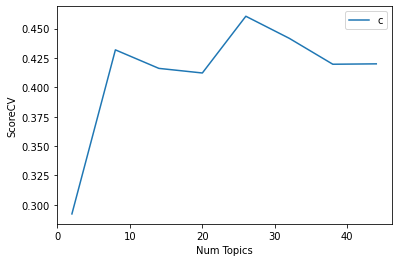

In [54]:
plot("CV", cv)

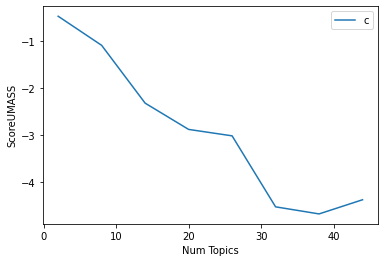

In [55]:
plot("UMASS", umass)

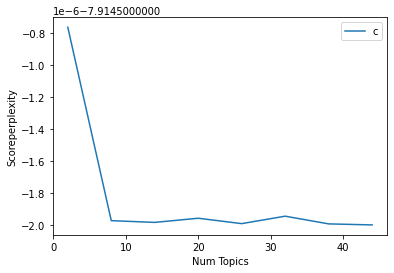

In [56]:
plot("perplexity", perplexity)

# Hyperparameter tuning

In [ ]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 40
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [ ]:
# load res
pd.set_option('display.max_rows', None)
res = pd.read_csv('lda_tuning_results.csv')
res

In [ ]:
df_coherence = res.groupby('Topics').mean()

In [ ]:
df_coherence.plot.line()

# Final model

In [60]:
!pip install pyLDAvis==3.2.2

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached pyLDAvis-3.2.2-py2.py3-none-any.whl
  Attempting uninstall: pyLDAvis
    Found existing installation: pyLDAvis 3.3.1
    Uninstalling pyLDAvis-3.3.1:
      Successfully uninstalled pyLDAvis-3.3.1
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [150]:
# Build LDA model
num_topics=32
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                               id2word=id2word,
                               num_topics=num_topics,
                               random_state=100,
                               chunksize=200,
                               passes=1,
                               per_word_topics=True,
                               alpha='auto')

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(1,
  '0.005*"leader" + 0.005*"london" + 0.004*"world" + 0.003*"paris" + '
  '0.003*"people" + 0.002*"statue" + 0.002*"new_york" + 0.002*"cashier" + '
  '0.002*"liberty" + 0.002*"know"'),
 (23,
  '0.043*"dress" + 0.036*"wear" + 0.022*"shirt" + 0.009*"fabric" + '
  '0.008*"jean" + 0.004*"cotton" + 0.004*"really" + 0.003*"occasion" + '
  '0.003*"formal" + 0.002*"even"'),
 (22,
  '0.004*"stranger" + 0.004*"traffic" + 0.004*"noise" + 0.002*"really" + '
  '0.002*"blood" + 0.002*"vehicle" + 0.002*"people" + 0.002*"try" + '
  '0.001*"place" + 0.001*"many"'),
 (17,
  '0.205*"pizza" + 0.029*"eat" + 0.020*"wholesome" + 0.016*"healthy" + '
  '0.006*"food" + 0.006*"nutritious" + 0.003*"contains" + 0.003*"video" + '
  '0.003*"important" + 0.002*"lifestyle"'),
 (2,
  '0.110*"library" + 0.010*"astronaut" + 0.009*"study" + 0.008*"ambition" + '
  '0.005*"material" + 0.005*"exit" + 0.004*"achieve" + 0.004*"really" + '
  '0.004*"book" + 0.004*"interest"'),
 (8,
  '0.040*"car" + 0.025*"pharmaceutical" + 

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# eval

In [152]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score CV: ', coherence_lda)

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score UMASS: ', coherence_lda)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.781078072018223

Coherence Score CV:  0.3075082804124449

Coherence Score UMASS:  -2.206019319497906


# visualize

In [153]:
import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')
vis

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
21     0.000471  0.137858       1        1  23.095075
29    -0.092798  0.191299       2        1   9.961361
3     -0.058553  0.138226       3        1   8.469810
11    -0.036710  0.218017       4        1   8.238801
28     0.057723  0.269068       5        1   7.925393
0      0.127803  0.220639       6        1   6.943890
25     0.122247  0.105773       7        1   5.844901
5     -0.006248  0.266640       8        1   4.388258
20     0.144633  0.150848       9        1   3.746564
13    -0.219312  0.187359      10        1   3.525576
10     0.071667  0.163929      11        1   2.769138
15    -0.160720  0.220000      12        1   2.727586
24    -0.209180  0.077103      13        1   2.574782
26    -0.274540  0.025272      14        1   1.509532
7      0.260334  0.112237      15        1   1.462198
9     -0.214469 -0.044513      16        1   1.453394
30     0.298768 -0.011168      17        1   1.409018
16     0.052717  0.031504      18        1   1.239662
19     0.155062 -0.044310      19        1   0.697760
14    -0.168182 -0.103335      20        1   0.474399
6      0.247882 -0.203127      21        1   0.298191
31     0.021349 -0.098542      22        1   0.252682
27    -0.098196 -0.191174      23        1   0.187568
4      0.108611 -0.184453      24        1   0.181150
18    -0.051754 -0.164966      25        1   0.134170
23     0.002155 -0.226574      26        1   0.123518
12    -0.058883 -0.073726      27        1   0.119480
8      0.021891 -0.157143      28        1   0.102816
2      0.034601 -0.213047      29        1   0.074177
17    -0.062000 -0.319650      30        1   0.050893
1     -0.003846 -0.254547      31        1   0.012379
22    -0.012525 -0.225497      32        1   0.005879, topic_info=        Term         Freq        Total Category  logprob  loglift
300     book  2214.000000  2214.000000  Default  30.0000  30.0000
21   country  1649.000000  1649.000000  Default  29.0000  29.0000
769    story   850.000000   850.000000  Default  28.0000  28.0000
896  website  1230.000000  1230.000000  Default  27.0000  27.0000
268    place  2225.000000  2225.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
157     life     0.020503  1838.445470  Topic32  -6.8972  -1.6624
109     year     0.020013  1897.406660  Topic32  -6.9214  -1.7181
75    person     0.019113  1252.797676  Topic32  -6.9674  -1.3490
248     help     0.018989  1274.805869  Topic32  -6.9740  -1.3730
300     book     0.019453  2214.690950  Topic32  -6.9498  -1.9011

[2090 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2973      8  0.353293    abandon
2973     15  0.481763    abandon
2973     16  0.128470    abandon
296       1  0.173535       able
296       2  0.065309       able
...     ...       ...        ...
794       1  0.112142  zamperini
794      21  0.784993  zamperini
1204      2  0.930069   zhejiang
2659      6  0.269910       zone
2659     18  0.629790       zone

[8663 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 30, 4, 12, 29, 1, 26, 6, 21, 14, 11, 16, 25, 27, 8, 10, 31, 17, 20, 15, 7, 32, 28, 5, 19, 24, 13, 9, 3, 18, 2, 23])

## SAVE MODEL

In [154]:
import pickle 
model_filepath = 'best_model_' + str(num_topics)
with open(model_filepath, 'wb') as f:
    pickle.dump(lda_model, f)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
import pickle 


LDAvis_data_filepath = 'LDA_model_' + str(num_topics)

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds='mmds')

with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


## LOAD MODEL

In [156]:
    
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, 'LDA_model_' + str(num_topics) +'.html')
LDAvis_prepared

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
21     0.000471  0.137858       1        1  23.096572
29    -0.092798  0.191299       2        1   9.959229
3     -0.058553  0.138226       3        1   8.473559
11    -0.036710  0.218017       4        1   8.239869
28     0.057723  0.269068       5        1   7.925421
0      0.127803  0.220639       6        1   6.940527
25     0.122247  0.105773       7        1   5.843839
5     -0.006248  0.266640       8        1   4.388531
20     0.144633  0.150848       9        1   3.748124
13    -0.219312  0.187359      10        1   3.524927
10     0.071667  0.163929      11        1   2.767366
15    -0.160720  0.220000      12        1   2.727703
24    -0.209180  0.077103      13        1   2.571727
26    -0.274540  0.025272      14        1   1.508470
7      0.260334  0.112237      15        1   1.463188
9     -0.214469 -0.044513      16        1   1.453099
30     0.298768 -0.011168      17        1   1.409465
16     0.052717  0.031504      18        1   1.242607
19     0.155062 -0.044310      19        1   0.698280
14    -0.168182 -0.103335      20        1   0.474389
6      0.247882 -0.203127      21        1   0.297783
31     0.021349 -0.098542      22        1   0.253189
27    -0.098196 -0.191174      23        1   0.187887
4      0.108611 -0.184453      24        1   0.180724
18    -0.051754 -0.164966      25        1   0.133962
23     0.002155 -0.226574      26        1   0.124180
12    -0.058883 -0.073726      27        1   0.119116
8      0.021891 -0.157143      28        1   0.102835
2      0.034601 -0.213047      29        1   0.074265
17    -0.062000 -0.319650      30        1   0.050893
1     -0.003846 -0.254547      31        1   0.012392
22    -0.012525 -0.225497      32        1   0.005879, topic_info=        Term         Freq        Total Category  logprob  loglift
300     book  2214.000000  2214.000000  Default  30.0000  30.0000
21   country  1648.000000  1648.000000  Default  29.0000  29.0000
769    story   850.000000   850.000000  Default  28.0000  28.0000
896  website  1229.000000  1229.000000  Default  27.0000  27.0000
268    place  2225.000000  2225.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
157     life     0.020503  1838.523929  Topic32  -6.8972  -1.6624
109     year     0.020013  1897.420838  Topic32  -6.9214  -1.7181
75    person     0.019113  1252.836982  Topic32  -6.9674  -1.3490
248     help     0.018989  1274.685559  Topic32  -6.9740  -1.3729
300     book     0.019453  2214.270002  Topic32  -6.9498  -1.9009

[2090 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2973      8  0.353170    abandon
2973     15  0.481596    abandon
2973     16  0.128425    abandon
296       1  0.173557       able
296       2  0.065317       able
...     ...       ...        ...
794       1  0.112258  zamperini
794      21  0.785805  zamperini
1204      2  0.930255   zhejiang
2659      6  0.269518       zone
2659     18  0.628875       zone

[8662 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[22, 30, 4, 12, 29, 1, 26, 6, 21, 14, 11, 16, 25, 27, 8, 10, 31, 17, 20, 15, 7, 32, 28, 5, 19, 24, 13, 9, 3, 18, 2, 23])

## predict

In [157]:
from gensim.test.utils import common_corpus, common_dictionary

document = "I like cars"

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [158]:
document = document.split()
document

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['I', 'like', 'cars']

In [159]:
bow = common_dictionary.doc2bow(document)
t = lda_model.get_document_topics(bow)
t = sorted(t, key=lambda tup: tup[1], reverse=True)
t

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(21, 0.12229104),
 (29, 0.068559945),
 (11, 0.053861514),
 (0, 0.050708834),
 (3, 0.049504016),
 (28, 0.046589382),
 (25, 0.042421855),
 (10, 0.041120056),
 (20, 0.038266566),
 (5, 0.036253452),
 (15, 0.034039225),
 (24, 0.032642446),
 (13, 0.03129067),
 (16, 0.028812554),
 (7, 0.028430844),
 (26, 0.026249481),
 (30, 0.022949472),
 (19, 0.02140121),
 (31, 0.019313358),
 (9, 0.018937347),
 (12, 0.018293178),
 (14, 0.017980771),
 (6, 0.01686802),
 (18, 0.01676116),
 (27, 0.016081842),
 (4, 0.015785728),
 (8, 0.015639467),
 (2, 0.014323096),
 (17, 0.013848637),
 (22, 0.013808278),
 (23, 0.013765771),
 (1, 0.013200815)]